In [1]:
import numpy as np
import nibabel as nib
from vox.viz import grid_view
from vox.utils import one_hot
import matplotlib.pyplot as plt
%matplotlib inline

vox_path = '../asset/data/sa.nii.gz'
vox_gt_path = '../asset/data/sa_gt.nii.gz'
ED = 0
ES = 7

In [2]:
def read_nii_gz(path):
    nib_vol = nib.load(path)
    data = nib_vol.get_fdata()
    affine = nib_vol.affine
    return nib_vol, data, affine

In [3]:
vox, vox_data, vox_affine = read_nii_gz(vox_path)
vox_gt, vox_gt_data, vox_gt_affine = read_nii_gz(vox_gt_path)

In [4]:
print('vox data: ', vox_data.shape)
print('vox gt data: ', vox_gt_data.shape)
vox_ed_data = vox_data[:, :, :, ED]
vox_gt_ed_data = vox_gt_data[:, :, :, ED]
print('vox ed data: ', vox_ed_data.shape)
print('vox gt ed data: ', vox_gt_ed_data.shape)

vox data:  (208, 256, 12, 25)
vox gt data:  (208, 256, 12, 25)
vox ed data:  (208, 256, 12)
vox gt ed data:  (208, 256, 12)


grid out shape (788, 857)


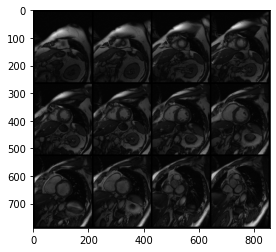

In [5]:
grid_out = grid_view.grid_view(vox_ed_data, layout=(3, 4), margin=5)
print('grid out shape', grid_out.shape)
plt.imshow(grid_out, cmap='gray')
plt.show()

grid out shape (788, 857)


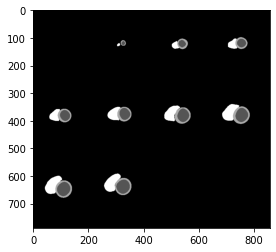

In [6]:
grid_gt_out = grid_view.grid_view(vox_gt_ed_data, layout=(3, 4), margin=5)
print('grid out shape', grid_gt_out.shape)
plt.imshow(grid_gt_out, cmap='gray')
plt.show()

In [7]:
one_hot_mask = one_hot(vox_gt_ed_data, num_classes=4)
print('one_hot mask shape', one_hot_mask.shape)
print('=========')
one_hot_grid = one_hot(grid_gt_out, num_classes=4)
print('one_hot mask shape', one_hot_grid.shape)

one_hot mask shape (4, 208, 256, 12)
one_hot mask shape (4, 788, 857)


grid out shape (788, 857)
one_hot mask shape (4, 788, 857)
rgb shape:  (3, 788, 857)


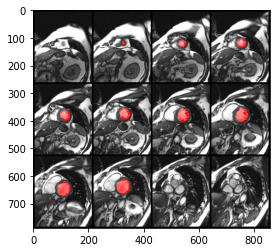

rgb shape:  (3, 788, 857)


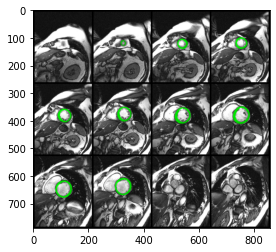

rgb shape:  (3, 788, 857)


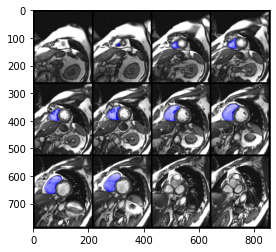

In [8]:
from vox.viz import mask_cover

grid_out = grid_view.grid_view(vox_ed_data, layout=(3, 4), margin=5)
print('grid out shape', grid_out.shape)
one_hot_grid = one_hot(grid_gt_out, num_classes=4)
print('one_hot mask shape', one_hot_grid.shape)

rgb = mask_cover.mask_cover(grid_out, one_hot_grid, show_class=1, is_one_hoted_mask=True)

print('rgb shape: ', rgb.shape)
plt.imshow(rgb.transpose((1, 2, 0)))
plt.show()

rgb = mask_cover.mask_cover(grid_out, one_hot_grid, show_class=2, is_one_hoted_mask=True, color=(0, 255, 0))
print('rgb shape: ', rgb.shape)
plt.imshow(rgb.transpose((1, 2, 0)))
plt.show()

rgb = mask_cover.mask_cover(grid_out, one_hot_grid, show_class=3, is_one_hoted_mask=True, color=(0, 0, 255))
print('rgb shape: ', rgb.shape)
plt.imshow(rgb.transpose((1, 2, 0)))
plt.show()

rgb shape:  (3, 788, 857)


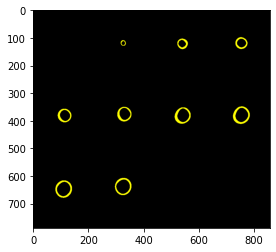

In [9]:
from vox.viz import seg_mask

rgb = seg_mask.seg_mask_cmp(one_hot_grid, one_hot_grid, show_class=2)
print('rgb shape: ', rgb.shape)
plt.imshow(rgb.transpose((1, 2, 0)))
plt.show()

rgb shape:  (3, 788, 857)


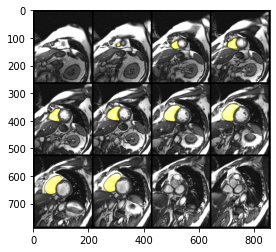

In [10]:
rgb = mask_cover.cmp_cover(grid_out, one_hot_grid, one_hot_grid, show_class=3)
print('rgb shape: ', rgb.shape)
plt.imshow(rgb.transpose((1, 2, 0)))
plt.show()


In [ ]:
from vox.viz import seg_mask